In [1]:
from map_manager.map_generator import map
from map_manager.noise import toddler

/Users/cetiners/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [15]:
nw = map()

nw.populate_map(n_locations=1024, name="terrain",relaxed=True,k=100)
nw.populate_map(n_locations=1024, name="civilisation",relaxed=True,k=100)
nw.populate_map(n_locations=1024, name="threat",relaxed=True, k=100)


nw.attribute_view(seed_1=20,seed_2=30,map_name="terrain",view_name="terrain")
nw.attribute_view(seed_1=40,seed_2=50,map_name="civilisation",view_name="civilisation")
nw.attribute_view(seed_1=34,seed_2=34,map_name="threat",view_name="threat",double=False)

array([[0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 5., 5., 5.],
       [2., 2., 2., ..., 5., 5., 5.],
       [2., 2., 2., ..., 5., 5., 5.]])

(1024, 1024) (1024, 1024) (1024, 1024)


Text(0.5, 1.0, 'Threat')

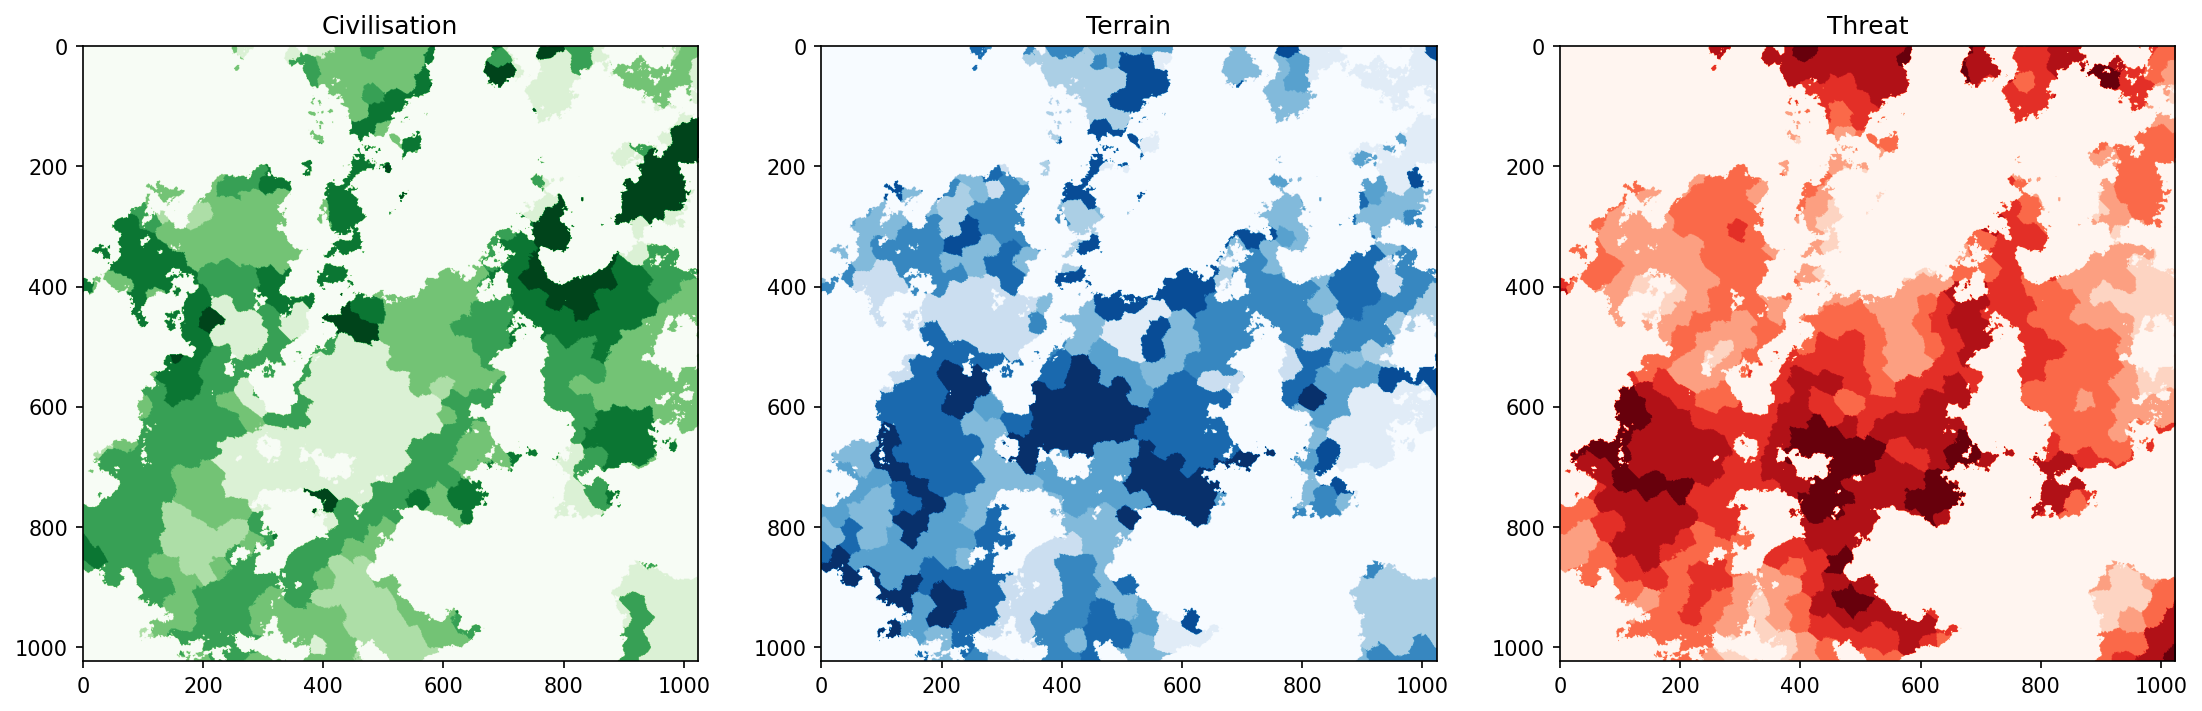

In [18]:

civ = nw.views["civilisation"].copy()
ter = nw.views["terrain"].copy()
thr = nw.views["threat"].copy()

print(civ.shape,ter.shape,thr.shape)

for i in range(1024):
    for j in range(1024):
        civ[i,j] += 1
        ter[i,j] += 1
        thr[i,j] += 1

import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(1,3)
fig.set_dpi(150)
fig.set_size_inches(18, 6)

import random
seed=random.randint(1,100)
res=2
octaves = 20
persistence = 0.60
lacunarity = 2
mask = toddler(size=1024, seed=seed,res=res, octaves = octaves, persistence = persistence, lacunarity = lacunarity,mask=True)

ax[0].imshow(civ*(np.invert(mask)),cmap="Greens")
ax[0].set_title("Civilisation")

ax[1].imshow(ter*(np.invert(mask)),cmap="Blues")
ax[1].set_title("Terrain")

ax[2].imshow(thr*(np.invert(mask)),cmap="Reds")
ax[2].set_title("Threat")